In [1]:
#!jt -t onedork -T -N -kl -f fira -nfs 10
#!jt -t onedork -T -N -kl -f fira -nfs 9 -fs 10 -tf robotosans -cellw 70% -lineh 170
#!jt -t onedork -T -N -kl -f fira -nfs 9 -fs 10 -tf robotosans

# Importar librerías

- Astropy
- pandas
- numpy


In [2]:
from astropy.io import fits
import numpy as np
import datetime
import pandas as pd

import glob #para linux
from glob import os #para windows

import matplotlib.pyplot as plt
import subprocess

In [3]:
from astropy.visualization import (HistEqStretch, 
                                   simple_norm, 
                                   ImageNormalize, 
                                   imshow_norm, 
                                   MinMaxInterval, 
                                   LogStretch)
from sklearn import preprocessing
import matplotlib.animation as animation

In [4]:
from scipy import ndimage, misc

In [5]:
%matplotlib inline
#%matplotlib notebook

In [6]:
pathToFiles = 'DATA'
orderedList = sorted(glob.glob(os.path.join(pathToFiles, '*.fts')))
contador=0
for filename in orderedList:
    contador+=1
print("\nExisten {} archivos fts".format(contador))


Existen 46 archivos fts


In [7]:
len(orderedList)

46

In [8]:
for i in range(len(orderedList)):
    hdulist1 = fits.open(orderedList[i])
    headerList = hdulist1[0].header
    hdulist1.close()
    if (headerList['NAXIS1'] != 2048 and headerList['NAXIS2'] != 2048):
        print(i, orderedList[i], str(headerList['NAXIS1']), str(headerList['NAXIS2']))

40 DATA\20181111_065424_d7c2A.fts 256 256


In [9]:
# Obtener lista de datos que son 2048x2048
listaDatos = []
for filename in orderedList:
  hdulist = fits.open(filename)
  data = hdulist[0].data
  hdulist.close
  if data.shape == (2048, 2048):
    listaDatos.append(filename)
print("\nDe los cuales {} son  de tamaño 2048 x 2048".format(len(listaDatos)))



De los cuales 45 son  de tamaño 2048 x 2048


In [10]:
# Obtener lista de datos que son 2048x2048

#listaDatos = []
#for i in range(len(orderedList)):
#    hdulist = fits.open(orderedList[i])
#    #data = hdulist[0].data
#    headerList = hdulist[0].header
#    hdulist.close
#    if (headerList['NAXIS1'] == 2048 and headerList['NAXIS2'] == 2048):
#        listaDatos.append(orderedList[i])
#print("\nDe los cuales {} son  de tamaño 2048 x 2048".format(len(listaDatos)))


In [11]:
hdulist1 = fits.open(listaDatos[0])
headerList = hdulist1[0].header
hdulist1.close()

maph=pd.DataFrame(columns=headerList)
maph

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE-OBS,FILEORIG,SEB_PROG,SYNC,...,FPSDAS3,FPSDAQ1,FPSDAQ2,FPSDAQ3,DATAMDN,HISTORY,HISTORY,HISTORY,HISTORY,HISTORY


In [12]:
cel = []
for i in range(len(listaDatos)):
    hdulist1 = fits.open(listaDatos[i])
    headerList = hdulist1[0].header
    hdulist1.close()
    for headerInplace in headerList:
        cel.append(headerList[headerInplace])
    maph.loc[i]=cel
    cel=[]


In [13]:
cel = []
for i in range(len(orderedList)):
    hdulist1 = fits.open(orderedList[i])
    headerList = hdulist1[0].header
    hdulist1.close()
    for headerInplace in headerList:
        cel.append(headerList[headerInplace])
    print(i, orderedList[i], 'tiene ', len(cel), 'columnas')
    #maph.loc[i]=cel
    cel=[]


0 DATA\20181110_102400_d4c2A.fts tiene  253 columnas
1 DATA\20181110_105400_d4c2A.fts tiene  253 columnas
2 DATA\20181110_112400_d4c2A.fts tiene  253 columnas
3 DATA\20181110_115400_d4c2A.fts tiene  253 columnas
4 DATA\20181110_122400_d4c2A.fts tiene  253 columnas
5 DATA\20181110_125400_d4c2A.fts tiene  253 columnas
6 DATA\20181110_132400_d4c2A.fts tiene  253 columnas
7 DATA\20181110_135400_d4c2A.fts tiene  253 columnas
8 DATA\20181110_142400_d4c2A.fts tiene  253 columnas
9 DATA\20181110_145400_d4c2A.fts tiene  253 columnas
10 DATA\20181110_152400_d4c2A.fts tiene  253 columnas
11 DATA\20181110_155400_d4c2A.fts tiene  253 columnas
12 DATA\20181110_162400_d4c2A.fts tiene  253 columnas
13 DATA\20181110_172400_d4c2A.fts tiene  253 columnas
14 DATA\20181110_175400_d4c2A.fts tiene  253 columnas
15 DATA\20181110_182400_d4c2A.fts tiene  253 columnas
16 DATA\20181110_185400_d4c2A.fts tiene  253 columnas
17 DATA\20181110_192400_d4c2A.fts tiene  253 columnas
18 DATA\20181110_195400_d4c2A.fts tien

In [14]:
maph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Columns: 253 entries, SIMPLE to HISTORY
dtypes: bool(9), float64(88), int64(92), object(64)
memory usage: 86.5+ KB


In [15]:
maph.head()

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE-OBS,FILEORIG,SEB_PROG,SYNC,...,FPSDAS3,FPSDAQ1,FPSDAQ2,FPSDAQ3,DATAMDN,HISTORY,HISTORY,HISTORY,HISTORY,HISTORY
0,True,16,2,2048,2048,True,2018-11-10T10:24:00.005,IB10028D.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
1,True,16,2,2048,2048,True,2018-11-10T10:54:00.005,IB1002C9.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
2,True,16,2,2048,2048,True,2018-11-10T11:24:00.005,IB1002GE.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
3,True,16,2,2048,2048,True,2018-11-10T11:54:00.005,IB1002K9.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
4,True,16,2,2048,2048,True,2018-11-10T12:24:00.005,IB1002NW.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."


In [16]:
expTime=maph.EXPTIME
mExpTime=np.mean(expTime)
mExpTime

6.003693466666666

In [17]:
#exposures = maph.EXPTIME
#exposures =  np.append(exposures,2.00124)
#stdExpTime = np.std(exposures)
#stdExpTime


In [18]:
stdExpTime=np.std(maph.EXPTIME)
stdExpTime

7.744819056681542e-06

In [19]:
#maph = maph[(maph.EXPTIME >= (mExpTime - stdExpTime)) & (maph.EXPTIME <= (mExpTime + stdExpTime))]
maph = maph[(maph.EXPTIME >= (mExpTime - 1.5)) & (maph.EXPTIME <= (mExpTime + 1.5))]
tama = len(maph)
tama

45

In [20]:
listaDatosFiltrados = []
for fit_index in maph.index:
    listaDatosFiltrados.append(listaDatos[fit_index])
len(listaDatosFiltrados)

45

In [21]:
listaDatosFiltrados

['DATA\\20181110_102400_d4c2A.fts',
 'DATA\\20181110_105400_d4c2A.fts',
 'DATA\\20181110_112400_d4c2A.fts',
 'DATA\\20181110_115400_d4c2A.fts',
 'DATA\\20181110_122400_d4c2A.fts',
 'DATA\\20181110_125400_d4c2A.fts',
 'DATA\\20181110_132400_d4c2A.fts',
 'DATA\\20181110_135400_d4c2A.fts',
 'DATA\\20181110_142400_d4c2A.fts',
 'DATA\\20181110_145400_d4c2A.fts',
 'DATA\\20181110_152400_d4c2A.fts',
 'DATA\\20181110_155400_d4c2A.fts',
 'DATA\\20181110_162400_d4c2A.fts',
 'DATA\\20181110_172400_d4c2A.fts',
 'DATA\\20181110_175400_d4c2A.fts',
 'DATA\\20181110_182400_d4c2A.fts',
 'DATA\\20181110_185400_d4c2A.fts',
 'DATA\\20181110_192400_d4c2A.fts',
 'DATA\\20181110_195400_d4c2A.fts',
 'DATA\\20181110_202400_d4c2A.fts',
 'DATA\\20181110_205400_d4c2A.fts',
 'DATA\\20181110_212400_d4c2A.fts',
 'DATA\\20181110_215400_d4c2A.fts',
 'DATA\\20181110_222400_d4c2A.fts',
 'DATA\\20181110_225400_d4c2A.fts',
 'DATA\\20181110_232400_d4c2A.fts',
 'DATA\\20181110_235400_d4c2A.fts',
 'DATA\\20181111_002400_d4c2

In [22]:
mapa = []
for fit in listaDatosFiltrados:
    hdulist = fits.open(fit)
    datatemp = hdulist[0].data
    hdulist.close()
    
    mapa.append(datatemp)

In [23]:
len(mapa)

45

In [24]:
mapa

[array([[2062, 2062, 2062, ..., 2060, 2060, 2060],
        [2062, 2062, 2062, ..., 2060, 2060, 2060],
        [2062, 2062, 2062, ..., 2060, 2060, 2060],
        ...,
        [2064, 2064, 2066, ..., 2062, 2062, 2062],
        [2064, 2064, 2076, ..., 2062, 2062, 2062],
        [2064, 2064, 2062, ..., 2062, 2062, 2062]], dtype=uint16),
 array([[2062, 2062, 2062, ..., 2062, 2062, 2062],
        [2062, 2062, 2062, ..., 2062, 2062, 2062],
        [2062, 2062, 2062, ..., 2062, 2062, 2062],
        ...,
        [2062, 2062, 2062, ..., 2062, 2062, 2062],
        [2062, 2062, 2062, ..., 2062, 2062, 2062],
        [2062, 2062, 2062, ..., 2062, 2062, 2062]], dtype=uint16),
 array([[2062, 2062, 2062, ..., 2062, 2062, 2062],
        [2062, 2062, 2062, ..., 2062, 2062, 2062],
        [2062, 2062, 2062, ..., 2062, 2062, 2062],
        ...,
        [2064, 2064, 2064, ..., 2066, 2068, 2070],
        [2064, 2064, 2064, ..., 2066, 2068, 2070],
        [2064, 2064, 2064, ..., 2066, 2068, 2070]], dtype=uint

In [25]:
from skimage.util import img_as_float

In [26]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [27]:
#map_s = []
#contador = 0
#for image in range(len(mapa)):
#    #fit_temp = ndimage.uniform_filter(mapa[image], size=4, mode='constant', output=float)
#    fit_temp = ndimage.uniform_filter(mapa[image], size=10, mode='constant')

#    map_s.append(fit_temp)
#    contador += 1
#    print("done: ", contador)

In [28]:
map_s = ndimage.uniform_filter(mapa, size=3, mode='nearest')

In [29]:
map_s

array([[[2062, 2062, 2062, ..., 2060, 2060, 2060],
        [2062, 2062, 2062, ..., 2060, 2060, 2060],
        [2062, 2062, 2062, ..., 2060, 2060, 2060],
        ...,
        [2063, 2063, 2062, ..., 2062, 2062, 2062],
        [2063, 2063, 2062, ..., 2062, 2062, 2062],
        [2063, 2063, 2062, ..., 2062, 2062, 2062]],

       [[2062, 2062, 2062, ..., 2061, 2061, 2061],
        [2062, 2062, 2062, ..., 2061, 2061, 2061],
        [2062, 2062, 2062, ..., 2061, 2061, 2061],
        ...,
        [2063, 2063, 2062, ..., 2063, 2063, 2064],
        [2063, 2063, 2062, ..., 2063, 2063, 2064],
        [2063, 2063, 2062, ..., 2063, 2063, 2064]],

       [[2062, 2062, 2062, ..., 2064, 2065, 2065],
        [2062, 2062, 2062, ..., 2064, 2065, 2065],
        [2062, 2062, 2062, ..., 2064, 2064, 2064],
        ...,
        [2063, 2063, 2063, ..., 2064, 2065, 2066],
        [2063, 2063, 2063, ..., 2064, 2065, 2066],
        [2063, 2063, 2063, ..., 2064, 2065, 2066]],

       ...,

       [[2062, 2062, 206

In [30]:
a1 = np.array([[  0.,   1.,   2.,   3.,   4.],
               [  5.,   6.,   7.,   8.,   9.],
               [ 10.,  11.,  12.,  13.,  14.],
               [ 15.,  16.,  17.,  18.,  19.],
               [ 20.,  21.,  22.,  23.,  24.]])
type(a1)

numpy.ndarray

In [31]:
a1[1,1]=53
a1

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5., 53.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]])

In [32]:
a2 = np.array([[  0.,   5.,   10.,   6.,   0.],
               [  5.,   6.,   20.,   8.,   9.],
               [ 10.,  25.,  50.,  13.,  10.],
               [ 5.,  16.,  25.,  18.,  9.],
               [ 0.,  5.,  12.,  6.,  0.]])
a2

array([[ 0.,  5., 10.,  6.,  0.],
       [ 5.,  6., 20.,  8.,  9.],
       [10., 25., 50., 13., 10.],
       [ 5., 16., 25., 18.,  9.],
       [ 0.,  5., 12.,  6.,  0.]])

In [33]:
a1_smooth = ndimage.uniform_filter(a1, size=2, mode='wrap', cval=0.0, origin=0)
#ndimage.uniform_filter(a1, size=3, mode='nearest', cval=0.0, origin=1)
ndimage.uniform_filter(a2, size=3, mode='nearest', cval=0.0)
#a1_smooth

array([[ 2.88888889,  6.77777778,  8.44444444,  7.66666667,  4.22222222],
       [ 7.33333333, 14.55555556, 15.88888889, 14.        ,  7.22222222],
       [ 9.66666667, 18.        , 20.11111111, 18.        , 10.55555556],
       [ 8.44444444, 16.44444444, 18.88888889, 15.88888889,  8.33333333],
       [ 4.        ,  8.88888889, 11.66666667,  9.77777778,  5.33333333]])

In [34]:
a1

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5., 53.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]])

In [35]:
a1_smooth = a1_smooth.tolist()
type(a1_smooth)

list

In [36]:
a1_smooth

[[12.0, 10.5, 11.5, 12.5, 13.5],
 [4.5, 14.75, 15.75, 5.0, 6.0],
 [9.5, 19.75, 20.75, 10.0, 11.0],
 [14.5, 13.0, 14.0, 15.0, 16.0],
 [19.5, 18.0, 19.0, 20.0, 21.0]]

In [37]:
mitad=1 #esto es para elegir el tamaño de la imagen 2 -> 512; 1 -> 1024
xc=maph.loc[0].CRPIX1/mitad
yc=maph.loc[0].CRPIX2/mitad
print("xc = {}".format(xc))
print("yc = {}".format(yc))

xc = 1027.0
yc = 1028.2


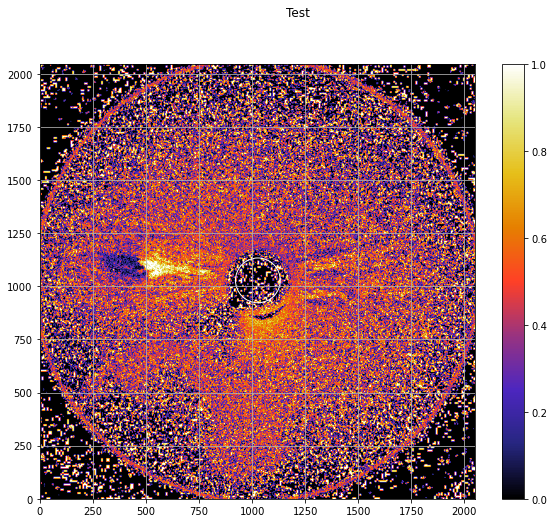

In [38]:
hdulist_a = fits.open(listaDatosFiltrados[29])
datatemp_a = hdulist_a[0].data
hdulist_a.close()

hdulist_b = fits.open(listaDatosFiltrados[30])
datatemp_b = hdulist_b[0].data
hdulist_b.close()

datemp_a = ndimage.uniform_filter(datatemp_a, size=3, mode='mirror')
datemp_b = ndimage.uniform_filter(datatemp_b, size=3, mode='mirror')
datatemp_dif = datatemp_b - datatemp_a

#datatemp_dif = ndimage.uniform_filter(datatemp_dif, size=3, mode='nearest')

# Normalizar la diferencia
normalized_data = preprocessing.normalize(datatemp_dif, norm="max")

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)
im, norm = imshow_norm(normalized_data,
                       ax, 
                       origin='lower',
                       #cmap='gnuplot2',
                       cmap='CMRmap')#,
                       #stretch=LogStretch())
                       #stretch=HistEqStretch(datatemp_dif))
ax.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
#for j in np.arange(len(rr)):
#    ax.plot(rr[j,0,:],rr[j,1,:], "w--")
ax.grid()
#plt.plot()
fig.suptitle("Test")
fig.colorbar(im)

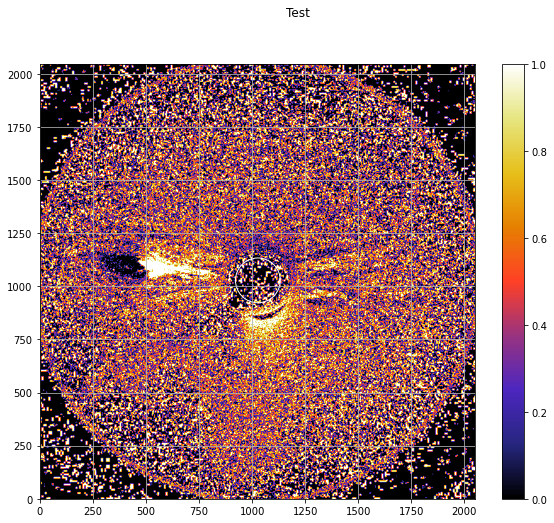

In [39]:
hdulist_a = fits.open(listaDatosFiltrados[29])
datatemp_a = hdulist_a[0].data
hdulist_a.close()

hdulist_b = fits.open(listaDatosFiltrados[30])
datatemp_b = hdulist_b[0].data
hdulist_b.close()

datatemp_a = ndimage.uniform_filter(datatemp_a, size=3, mode='nearest')
datatemp_b = ndimage.uniform_filter(datatemp_b, size=3, mode='nearest')
datatemp_dif = datatemp_b - datatemp_a

#datatemp_dif = ndimage.uniform_filter(datatemp_dif, size=3, mode='constant')

# Normalizar la diferencia
normalized_data = preprocessing.normalize(datatemp_dif, norm="max")

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)
im, norm = imshow_norm(normalized_data, ax, origin='lower',
                        #cmap='gnuplot2',
                        cmap='CMRmap')#,
                        #stretch=LogStretch())
                        #stretch=HistEqStretch(normalized_data))
ax.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
#for j in np.arange(len(rr)):
#    ax.plot(rr[j,0,:],rr[j,1,:], "w--")
ax.grid()
#plt.plot()
fig.suptitle("Test")
fig.colorbar(im)

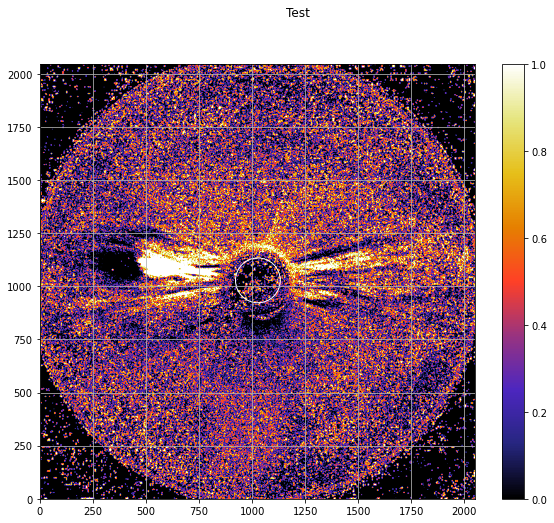

In [40]:
#datatemp_dif = map_s[33]-map_s[32]
datatemp_a = map_s[29]
datatemp_b = map_s[30]
datatemp_dif = datatemp_b - datatemp_a

#datatemp_dif = ndimage.uniform_filter(datatemp_dif, size=3, mode='constant')

# Normalizar la diferencia
normalized_data = preprocessing.normalize(datatemp_dif, norm = "max")

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)
im, norm = imshow_norm(normalized_data, 
                       ax, origin='lower',
                       #cmap='gnuplot2',
                       cmap='CMRmap')#,
                       #stretch=LogStretch())
                       #interval=MinMaxInterval(),
                       #stretch=HistEqStretch(normalized_data))
ax.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
#for j in np.arange(len(rr)):
#    ax.plot(rr[j,0,:],rr[j,1,:], "w--")
ax.grid()
#plt.plot()
fig.suptitle("Test")
fig.colorbar(im)

Aqui va el intento de cargar archivos csv

In [41]:
map_s.shape

(45, 2048, 2048)

In [42]:
from numpy import genfromtxt

In [43]:
pathToFiles = 'DATA'
listaCSV = sorted(glob.glob(os.path.join(pathToFiles, '*.csv')))
contador=0
for filename in listaCSV:
    contador+=1
print("\nExisten {} archivos csv".format(contador))


Existen 0 archivos csv


In [44]:
index = 0
s_idl={}
for csv in listaCSV:
    s_idl["%s" %index]=genfromtxt(listaCSV[index], delimiter=',')
    index += 1

In [49]:
print(listaCSV[21])

IndexError: list index out of range

In [50]:
cero = 0
s_idl[str(cero)]

KeyError: '0'

In [51]:
#datatemp_dif = datatemp_b - datatemp_a
#datatemp_a = map_s[29]
#datatemp_b = map_s[30]
#datatemp_dif = imagen_30 - imagen_29
#datatemp_dif = imagen_30 - map_s[30]
#datatemp_dif = s_idl["13"] - map_s[13]
##datatemp_dif = imagen_0 - map_s[0]
#datatemp_dif = map_s[30]
#datatemp_dif = imagen_0
#datatemp_dif = ndimage.uniform_filter(datatemp_dif, size=3, mode='reflect')
datatemp_dif = map_s[13] - s_idl["13"]
#datatemp_dif = s_idl["13"] - s_idl["13"]
#datatemp_dif = map_s[13] - map_s[13]

# Normalizar la diferencia
normalized_data = preprocessing.normalize(datatemp_dif, norm="max")

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)
im, norm = imshow_norm(datatemp_dif, 
                       ax, 
                       origin='lower',
                       #cmap='gnuplot2')#,
                       #cmap='seismic',
                       #cmap='gray')
                       cmap='CMRmap',
                       #stretch=LogStretch())
                       #interval = MinMaxInterval(),#),
                       stretch=HistEqStretch(datatemp_dif))

ax.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='yellow')
#for j in np.arange(len(rr)):
#    ax.plot(rr[j,0,:],rr[j,1,:], "w--")
ax.grid()
#plt.plot()
fig.suptitle("Test")
fig.colorbar(im)

KeyError: '13'

In [52]:
#datatemp_dif = datatemp_b - datatemp_a
#datatemp_dif = imagen_30 - imagen_29
datatemp_dif = s_idl["30"] - s_idl["29"]
#datatemp_dif = map_s[30] - map_s[29]


#datatemp_dif = ndimage.uniform_filter(datatemp_dif, size=3, mode='constant')

# Normalizar la diferencia
#normalized_data = preprocessing.normalize(datatemp_dif, norm="max")

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)
im, norm = imshow_norm(datatemp_dif, 
#im, norm = imshow_norm(normalized_data, 
                       ax, 
                       origin='lower',
                       #cmap='gnuplot2')#,
                       cmap='gray',
                       #cmap='seismic',
                       #stretch=LogStretch())
                       #cmap='CMRmap')#,
                       stretch=HistEqStretch(datatemp_dif))

ax.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
#for j in np.arange(len(rr)):
#    ax.plot(rr[j,0,:],rr[j,1,:], "w--")
ax.grid()
#plt.plot()
fig.suptitle("Test")
fig.colorbar(im)

KeyError: '30'

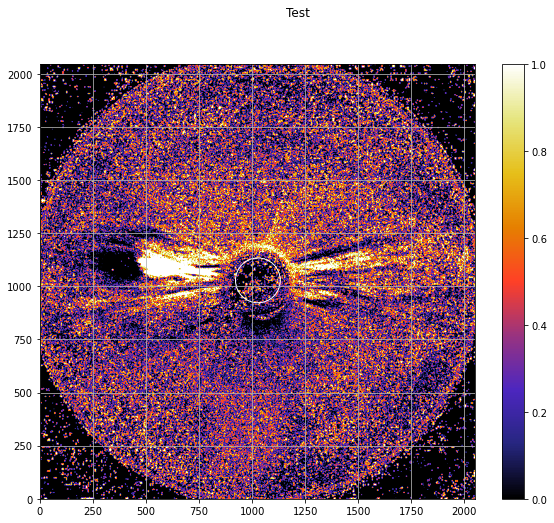

In [53]:
datatemp_a = map_s[29]
datatemp_b = map_s[30]
datatemp_dif = datatemp_b - datatemp_a
#datatemp_dif = imagen_30 - imagen_29


#datatemp_dif = ndimage.uniform_filter(datatemp_dif, size=3, mode='constant')

# Normalizar la diferencia
normalized_data = preprocessing.normalize(datatemp_dif, norm="max")

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)
im, norm = imshow_norm(normalized_data,
                       ax, 
                       origin='lower',
                       #cmap='gnuplot2')#,
                       cmap='CMRmap')#,
                       #stretch=LogStretch())
                       #interval = MinMaxInterval(),
                       #stretch=HistEqStretch(normalized_data))

ax.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
#for j in np.arange(len(rr)):
#    ax.plot(rr[j,0,:],rr[j,1,:], "w--")
ax.grid()
#plt.plot()
fig.suptitle("Test")
fig.colorbar(im)

In [54]:
for i in maph:
    if i == 'R_SUN':
        print("R_SUN existe")
    elif i == 'RSUN':
        print("RSUN existe")

RSUN existe


In [55]:
for header in maph:
    if header == 'R_SUN':
        r0=maph.loc[0].R_SUN/(maph.loc[0].CDELT1*mitad)
    elif header == 'RSUN':
        r0=maph.loc[0].RSUN/(maph.loc[0].CDELT1*mitad)

r0_20=20.*r0
r0_19=19.*r0
r0_15=15.*r0
r0_10=10.*r0

In [56]:
print("r0_20 = {}".format(r0_20))
print("r0_19 = {}".format(r0_19))
print("r0_15 = {}".format(r0_15))
print("r0_10 = {}".format(r0_10))

r0_20 = 1364.4457716190345
r0_19 = 1296.2234830380828
r0_15 = 1023.3343287142759
r0_10 = 682.2228858095173


In [57]:
import datetime
df_tiempo=pd.to_datetime(maph['DATE-OBS'])
df_tiempo.head()

0   2018-11-10 10:24:00.005
1   2018-11-10 10:54:00.005
2   2018-11-10 11:24:00.005
3   2018-11-10 11:54:00.005
4   2018-11-10 12:24:00.005
Name: DATE-OBS, dtype: datetime64[ns]

In [58]:
tiempos = [maph['DATE-OBS']]
header = ["DATE-OBS"]
df_tiempo = pd.concat(tiempos, axis = 1, keys = header)
df_tiempo.head()

,DATE-OBS
0,2018-11-10T10:24:00.005
1,2018-11-10T10:54:00.005
2,2018-11-10T11:24:00.005
3,2018-11-10T11:54:00.005
4,2018-11-10T12:24:00.005


In [59]:
tiempos=pd.to_datetime(df_tiempo['DATE-OBS'])
t0 = tiempos[0] # Esto fallará si se filtro el FITfile con el indice 0
delta = []
for celda in tiempos:
    delta.append((celda - t0).total_seconds())
delta

[0.0,
 1800.0,
 3600.0,
 5400.0,
 7200.0,
 9000.0,
 10800.0,
 12600.001,
 14400.0,
 16200.004,
 18000.002,
 19800.001,
 21599.986,
 25200.0,
 27000.0,
 28800.0,
 30600.0,
 32400.005,
 34200.001,
 36000.0,
 37800.0,
 39600.0,
 41400.0,
 43200.004,
 45000.003,
 46800.001,
 48600.002,
 50400.0,
 52200.0,
 54000.0,
 55800.001,
 57599.999,
 59400.0,
 61200.0,
 63000.001,
 64800.001,
 66600.001,
 68400.005,
 70200.004,
 72000.001,
 75600.0,
 77399.986,
 81000.0,
 82800.005,
 84600.004]

In [60]:
df_tiempo['SECONDS'] = delta
df_tiempo.head()

,DATE-OBS,SECONDS
0,2018-11-10T10:24:00.005,0.0
1,2018-11-10T10:54:00.005,1800.0
2,2018-11-10T11:24:00.005,3600.0
3,2018-11-10T11:54:00.005,5400.0
4,2018-11-10T12:24:00.005,7200.0


In [61]:
dx = maph.loc[0]['CDELT1']*1
dx

14.6999998093

In [62]:
#angulo=79.0
n_puntos=100
#ang_inc=3.0
ang_inc=0.5
print('centro = {}, {}'.format(xc,yc))

centro = 1027.0, 1028.2


In [63]:
if maph.loc[0].DETECTOR == 'COR2': #para stereo
    rrin=3
    rrfin=15
else:
    rrin=6
    rrfin=15
rrin

3

In [64]:
#rr=rrt=np.zeros((11,2,n_puntos),dtype=int)
#rrt

In [65]:
def setAngle(angulo, ang_inc, gap):
    gap_angle = np.arange(gap*(-1),gap+1)
    rr=rrt=np.zeros((1+gap*2,2,n_puntos),dtype=int)
    PA_m = angulo + 90
    rsol = r0
    index = np.arange(100)
    rads = np.linspace(rrin,rrfin,100)
    radios = np.zeros(n_puntos)
    for j in gap_angle:
        for i in index:
            rd = rads[i]
            radios[i] = rd
            radio=rsol * rd
            teta = (PA_m + ang_inc * j)*np.pi/180
            x = radio * np.cos(teta) + xc
            y = radio * np.sin(teta) + yc
            if x < 0 or y < 0:
                print(i, x, y)
            rr[j+gap][0][i]=x
            rr[j+gap][1][i]=y
    return rr

In [66]:
rads[38:41]

NameError: name 'rads' is not defined

In [67]:
#rr = setAngle(79,0.5,5)
rr = setAngle(80,3,5)
print(rr.shape)

(11, 2, 100)


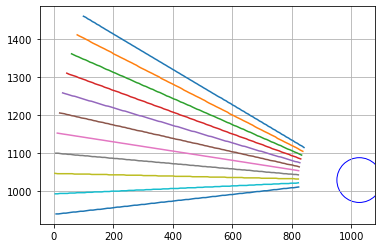

In [68]:
for i in np.arange(len(rr)):
    plt.plot(rr[i,0,:],rr[i,1,:])
#plt.xlim([0,2040])
#plt.ylim([750,1600])
plt.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='b')
plt.grid()
plt.show()

In [69]:
def diff(files):
    n = len(files)    
    #n = len(maph.index)
    frames = []
    if n > 0:
        for i in range(n - 1):  # Para desplegar todas las imagenes hacer range(n-1)        
        #for i in maph.index:  # Para desplegar todas las imagenes hacer range(n-1)
            
            # Abrir 2 FITS para restarlos
            #hdulistA = fits.open(files[i])
            #datosA = hdulistA[0].data
            #hdulistA.close()

            #hdulistB = fits.open(files[i + 1])
            #datosB = hdulistB[0].data
            #date = hdulistB[0].header['DATE-OBS']
            #hdulistB.close()
            
            datosA = map_s[i]
            datosB = map_s[i+1]
            
            hdulistB = fits.open(files[i + 1])
            date = hdulistB[0].header['DATE-OBS']
            hdulistB.close()

            imag_diff = datosB - datosA
            
            #imag_diff = ndimage.uniform_filter(imag_diff, size=3, mode='constant')


            # Normalizar la diferencia
            normalized_data = preprocessing.normalize(imag_diff)

            # Configurar figura con mejora de hist_eq
            fig = plt.figure(figsize=(19.2, 14.4))
            ax = fig.add_subplot(1, 1, 1)
            im, norm = imshow_norm(imag_diff, ax, origin='lower',
                                   cmap='CMRmap_r',                                   
                                   #cmap='brg',
                                   #cmap='gnuplot2',
                                   #interval=MinMaxInterval(),
                                   stretch=HistEqStretch(normalized_data))
                                   #stretch=LogStretch())

            # Obtener figrua y archivos .png
            fig.suptitle(date, fontsize=24)
            fig.colorbar(im)
            ax.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
            for j in np.arange(len(rr)):
                ax.plot(rr[j,0,:],rr[j,1,:], "w")
            ax.grid()
            plt.close(fig)
            fig.savefig(pathToFiles + "/file%02d.png" % i)

            # Mostrar porcentaje de avance en consola
            #j = (i + 1) / (n - 1)
            #sys.stdout.write('\r')
            #sys.stdout.write("[%-20s] %d%%" % ('=' * int(20 * j), 100 * j))
            #sys.stdout.flush()
            #sleep(0.25)

    # Obtener video junto a las imágenes .FIT y .png
    print("\n\nArchivos .png generados, Renderizando video...\n")
    os.chdir(pathToFiles)
    subprocess.call([
        'ffmpeg', '-framerate', '4', '-i', 'file%02d.png', '-r', '30', '-pix_fmt', 'yuv420p',
        'video_name.mp4'
    ])
    os.chdir('../')


# return fig
datos_diff = diff(listaDatosFiltrados)
print("\nPrograma Completado")



Archivos .png generados, Renderizando video...


Programa Completado


In [70]:
#librerias para iterar colores xd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.cm as mplcm
import matplotlib.colors as colors

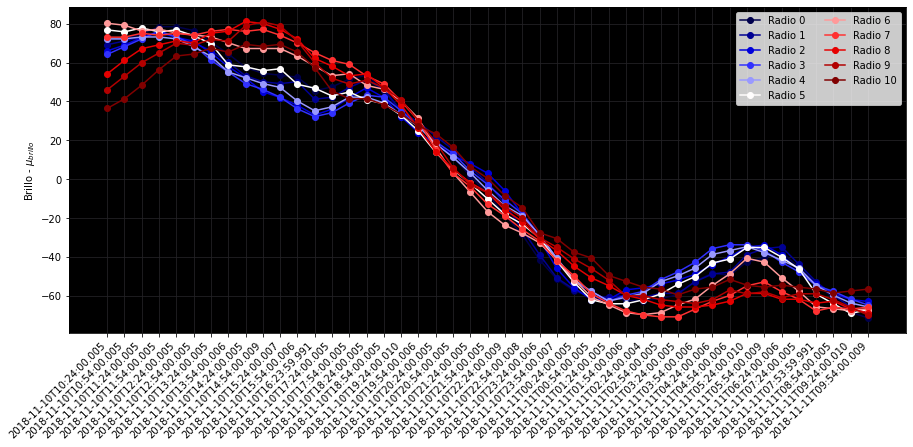

In [71]:
#rr = setAngle(79,2,5)
rr = setAngle(79,0.5,5)
fig = plt.figure(figsize = (15,6))
#fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}

NUM_COLORS = len(rr)
cm = plt.get_cmap('seismic')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

for radio in range(len(rr)):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        mapa_temp = map_s[indice]
        #hdulist = fits.open(listaDatosFiltrados[indice])
        #map = hdulist[0].data
        #hdulist.close()
        valorRadioCentral = np.append(valorRadioCentral,[mapa_temp[rr[radio][1][0]][[rr[radio][0][0]]]])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    
    #moving average
    #valorRadioCentral = movingaverage(valorRadioCentral,10)

    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    #from pandas.plotting import register_matplotlib_converters
    #register_matplotlib_converters()
    
    #iteración de colores
    ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])
    
    #graficar
    ax.plot_date(df_tiempo['DATE-OBS'], dic_radios["radio_No.%s" %radio], linestyle='solid',label='Radio %s' %radio)
    #ax.plot(label = 'radio' + str(radio))
    plt.xticks(rotation=45,  ha='right')

#iteración de colores
#ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
ax.grid(color = "#242326")
ax.legend(ncol=2)
#ax.set_facecolor('tab:gray')
ax.set_facecolor('black')
#ax.set_facecolor('xkcd:sky blue')
plt.ylabel("Brillo - $\mu_{brillo}$")
plt.show()

In [72]:
(76.6+79)/2

77.8

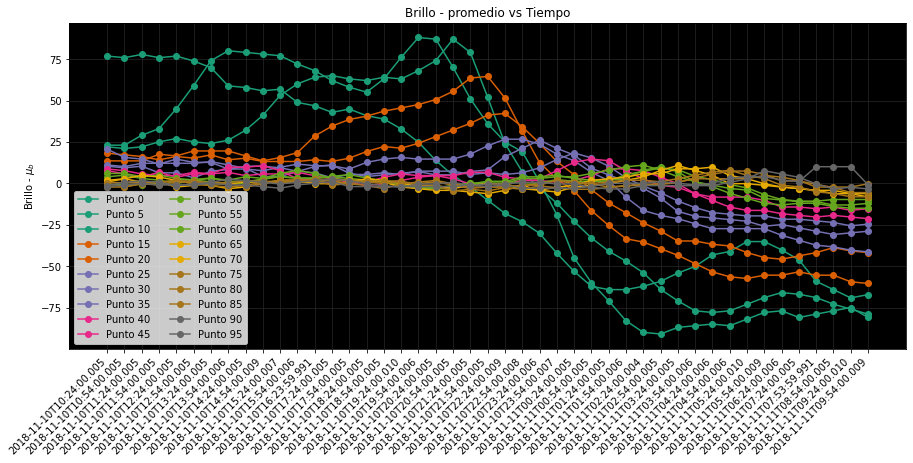

In [73]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize = (15,6))
#fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}

NUM_COLORS = 100
#cm = plt.get_cmap('gnuplot2_r')
cm = plt.get_cmap('Dark2')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

for radio in range(0,n_puntos,5):
#for radio in range(0,20,2):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        #hdulist = fits.open(listaDatosFiltrados[indice])
        #map = hdulist[0].data
        #hdulist.close()
        map = map_s[indice]
        #valorRadioCentral = np.append(valorRadioCentral,[map[rr[5][1][radio]][[rr[5][0][radio]]]])
        valorRadioCentral = np.append(valorRadioCentral,[map[rr[len(rr)//2][1][radio]][[rr[len(rr)//2][0][radio]]]])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    
    #moving average
    #valorRadioCentral = movingaverage(valorRadioCentral, 3)
    
    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    #iteración de colores
    ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])
    
    ax.plot_date(df_tiempo['DATE-OBS'], dic_radios["radio_No.%s" %radio], linestyle='solid',label='Punto %s' %radio)
    #ax.plot_date(tiempos, dic_radios["radio_No.%s" %radio], linestyle='solid',label='Punto %s' %radio)
    plt.xticks(rotation=45,  ha='right')
#ax.grid()
ax.grid(color = "#242326")
ax.legend(ncol=2)
#ax.set_facecolor('tab:gray')
ax.set_facecolor('black')
plt.ylabel("Brillo - $\mu_b$")
plt.title("Brillo - promedio vs Tiempo")
plt.show()

In [74]:
rSolarcsec=32*60
disterr=56./1920./2. #;mitad de la minima escala en Rs para LASCO C3
#if maph[0.DETECTOR eq 'COR2' then disterr= maph(0).CDELT1/rSolarcsec/2. #;mitad de la minima escala en Rs
disterr

0.014583333333333334

In [75]:
if (maph['DETECTOR'][0] == 'COR2'):
    disterr = maph['CDELT1'][0]/rSolarcsec/2
disterr

0.0038281249503385414

In [76]:
radios = np.linspace(rrin,rrfin,100)
radios

array([ 3.        ,  3.12121212,  3.24242424,  3.36363636,  3.48484848,
        3.60606061,  3.72727273,  3.84848485,  3.96969697,  4.09090909,
        4.21212121,  4.33333333,  4.45454545,  4.57575758,  4.6969697 ,
        4.81818182,  4.93939394,  5.06060606,  5.18181818,  5.3030303 ,
        5.42424242,  5.54545455,  5.66666667,  5.78787879,  5.90909091,
        6.03030303,  6.15151515,  6.27272727,  6.39393939,  6.51515152,
        6.63636364,  6.75757576,  6.87878788,  7.        ,  7.12121212,
        7.24242424,  7.36363636,  7.48484848,  7.60606061,  7.72727273,
        7.84848485,  7.96969697,  8.09090909,  8.21212121,  8.33333333,
        8.45454545,  8.57575758,  8.6969697 ,  8.81818182,  8.93939394,
        9.06060606,  9.18181818,  9.3030303 ,  9.42424242,  9.54545455,
        9.66666667,  9.78787879,  9.90909091, 10.03030303, 10.15151515,
       10.27272727, 10.39393939, 10.51515152, 10.63636364, 10.75757576,
       10.87878788, 11.        , 11.12121212, 11.24242424, 11.36

In [77]:
derr= disterr*radios**2
derr

array([0.03445312, 0.03729346, 0.04024628, 0.0433116 , 0.0464894 ,
       0.04977969, 0.05318246, 0.05669773, 0.06032548, 0.06406573,
       0.06791846, 0.07188368, 0.07596139, 0.08015159, 0.08445427,
       0.08886945, 0.09339711, 0.09803726, 0.1027899 , 0.10765503,
       0.11263265, 0.11772275, 0.12292535, 0.12824043, 0.133668  ,
       0.13920806, 0.14486061, 0.15062564, 0.15650317, 0.16249318,
       0.16859568, 0.17481068, 0.18113815, 0.18757812, 0.19413058,
       0.20079552, 0.20757296, 0.21446288, 0.22146529, 0.22858019,
       0.23580758, 0.24314745, 0.25059982, 0.25816467, 0.26584201,
       0.27363184, 0.28153416, 0.28954897, 0.29767626, 0.30591605,
       0.31426832, 0.32273308, 0.33131033, 0.34000007, 0.34880229,
       0.35771701, 0.36674421, 0.37588391, 0.38513609, 0.39450076,
       0.40397791, 0.41356756, 0.42326969, 0.43308432, 0.44301143,
       0.45305103, 0.46320312, 0.4734677 , 0.48384476, 0.49433432,
       0.50493636, 0.51565089, 0.52647791, 0.53741742, 0.54846

In [78]:
def fltarr(a,b,c):
    """
    FLTARR(a, b, c)    -> np.zeros((c, b, a))
    """        
    return np.zeros((c,b,a))

### Arreglo que contiene [numero de imagen], [direccion angulares], [distancias_radiales]

In [79]:
#output_idl=fltarr(n_puntos,rr.shape[0],tama) #; con el cambio en la dir radial
output_py=fltarr(n_puntos,rr.shape[0],tama) #; con el cambio en la dir radial


### Codigo en IDL para rellenar output
```idl
for j=0,tama-1 do for k=0,10 do for i=0, n_puntos-1 do $
output(i,k,j) = ( s(rr(i,0,k), rr(i,1,k), j) )
```

## Output python
Esto contiene el valor de brillo de nuestro cono, son:
- Datos sacados de 45 __imagenes__ 
- de las cuales se obtienen 11 __direcciones radiales__ (pueden ser mas o menos de 11)
- dibujados con 100 __puntos__ cada dirección

In [80]:
rr.shape

(11, 2, 100)

In [81]:
for i in range(tama):
    for j in range(rr.shape[0]):
        for k in range(100):
            output_py[i][j][k]  = map_s[     i  ][ rr[j,1,k] ][ rr[j,0,k] ]
            #output_idl[i][j][k] = s_idl[ str(i) ][ rr[j,1,k] ][ rr[j,0,k] ]

 ```python
for i in range(tama):
    for j in range(rr.shape[0]):
        for k in range(100):
            #output[i][j][k]    = map_s[    i ][rr[j,1,k]][rr[j,0,k]]
            output_idl[i][j][k] = s_idl[str(i)][rr[j,1,k]][rr[j,0,k]]
```

In [82]:
output_py.shape == output_idl.shape

NameError: name 'output_idl' is not defined

In [83]:
rr.shape[0]

11

In [84]:
rr.shape[1]

2

In [85]:
rr.shape[2]

100

In [86]:
len(map_s)

45

### The Background from all the maps

In [87]:
output_py.T.shape
output_idl.T.shape

NameError: name 'output_idl' is not defined

In [88]:
den_bg_er_idl = np.zeros((100,2))

In [89]:
den_bg_er_py = np.zeros((100,2))

In [90]:
for i in range(n_puntos):
    den_bg_er_idl[i][0] = np.mean(output_idl.T[i])
    den_bg_er_idl[i][1] = np.std(output_idl.T[i])

NameError: name 'output_idl' is not defined

In [91]:
for i in range(n_puntos):
    den_bg_er_py[i][0] = np.mean(output_py.T[i])
    den_bg_er_py[i][1] = np.std(output_py.T[i])

In [92]:
indtbkg = np.arange(31,44)
indtbkg

array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [93]:
output_py.T.shape

(100, 11, 45)

In [94]:
output_py[30:43].T.shape

(100, 11, 13)

In [95]:
max(indtbkg)

43

In [96]:
den_bgs_er=np.zeros((n_puntos,2))  #la den y el sigma de la den del background
for i in range(n_puntos):
    #den_bgs_er[i][0] = np.mean(output_py.T[i][:][min(indtbkg):max(indtbkg)])
    #den_bgs_er[i][1] = np.std( output_py.T[i][:][min(indtbkg):max(indtbkg)])
    den_bgs_er[i][0] = np.mean(output_py[ min(indtbkg):max(indtbkg) ].T[ i ])
    den_bgs_er[i][1] = np.std( output_py[ min(indtbkg):max(indtbkg) ].T[ i ])
den_bgs_er

array([[3471.36363636,   13.81000556],
       [3424.81818182,   16.87782218],
       [3406.0530303 ,   28.07088279],
       [3392.12121212,   23.29749314],
       [3385.61363636,   23.69715739],
       [3380.06818182,   20.10510005],
       [3378.11363636,   21.04023841],
       [3375.25      ,   19.36858398],
       [3371.21969697,   21.43464853],
       [3368.75757576,   18.44530047],
       [3371.37121212,   16.66851746],
       [3367.84090909,   15.4566008 ],
       [3367.87121212,   15.73810532],
       [3366.10606061,   15.42688404],
       [3361.02272727,   13.66784875],
       [3355.41666667,   15.91789619],
       [3351.06060606,   14.15806739],
       [3345.99242424,   12.98512915],
       [3339.14393939,   16.0864768 ],
       [3331.33333333,   16.22926027],
       [3320.40151515,   15.44582902],
       [3314.07575758,   14.54752984],
       [3304.88636364,   14.23964149],
       [3296.78787879,   15.50758871],
       [3288.59848485,   13.61308409],
       [3279.87878788,   

In [97]:
den_bg_er = den_bg_er_py

In [98]:
np.std(output_idl.T[39])

NameError: name 'output_idl' is not defined

In [ ]:
np.mean(den_bg_er_idl[:,0])

In [99]:
np.mean(den_bg_er_idl[:,1])

0.0

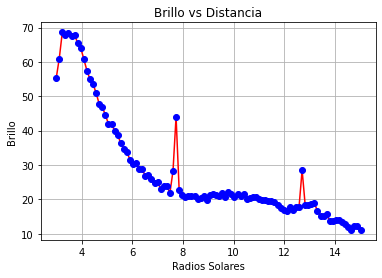

In [100]:
plt.plot(radios, den_bg_er_py[:,1], 'r-')
plt.plot(radios, den_bg_er_py[:,1], 'bo')
#plt.ylim([0, 9000])
#plt.xlim([2,16])
plt.title("Brillo vs Distancia")
plt.xlabel("Radios Solares")
plt.ylabel("Brillo")
plt.grid()
plt.show()

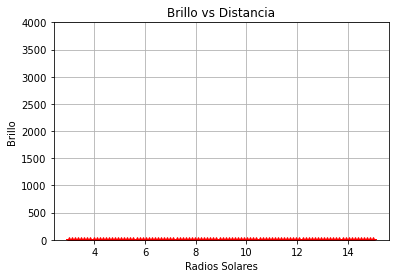

In [101]:
#plt.plot(radios, den_bg_er_idl[:,0], 'bo')
plt.plot(radios, den_bg_er_idl[:,0], 'r*')
plt.title("Brillo vs Distancia")
plt.xlabel("Radios Solares")
plt.ylabel("Brillo")
plt.grid()
plt.ylim([0, 4000])
plt.show()

In [102]:
den_bg_er_py[39,1]

44.071420548611016

In [103]:
derr[96:]

array([0.82007295, 0.83371218, 0.8474639 , 0.86132811])

In [104]:
len(den_bg_er)

100

In [105]:
np.min(output_py)

2415.0

In [106]:
#np.max(output_idl)

In [107]:
np.min(map_s)

2059

In [108]:
np.max(map_s)

12557

# Modo interactivo

In [109]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [111]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [112]:
def B(inicio,final):
    radios = np.linspace(3,15,100)
    #plt.plot(radios[i], den_bg_er[i:,0], 'r')
    #plt.plot(radios[:i], den_bg_er[:i,0], 'r')
    plt.plot(radios[inicio:final], den_bg_er_py[inicio:final,0], 'r')
    #plt.ylim([0, 4000])
    #plt.xlim([2,16])
    plt.title("Brillo vs Distancia")
    plt.xlabel("Radios Solares")
    plt.ylabel("Brillo")
    plt.grid()
    plt.show()
#interact(B, i=33)
#interact(B, i=widgets.IntSlider(min=0,max=99,step=1,value=10));
interact(B, inicio=widgets.IntSlider(min=0,max=99,step=1), final=widgets.IntSlider(min=0,max=99,step=1));

interactive(children=(IntSlider(value=0, description='inicio', max=99), IntSlider(value=0, description='final'…

In [113]:
x = "awesome"

def myfunc():
  global x
  #x = "fantastic"

myfunc()

print("Python is " + x)

Python is awesome


In [114]:
def direcciones(pa,delta,imagen):
    rr = setAngle(pa,delta,5)
    radios = np.linspace(3,15,100)
    fig = plt.figure(figsize = (20,8))
    #fig = plt.figure(figsize = (15,6))
    ax = fig.add_subplot(1, 1, 1)
    dic_radios={}
    NUM_COLORS = len(rr)
    cm = plt.get_cmap('seismic')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

    for radio in range(len(rr)):
        valorRadioCentral = np.array([])
        for indice in range(len(listaDatosFiltrados)):
            mapa_temp = map_s[indice]
            valorRadioCentral = np.append(valorRadioCentral,
                                          [mapa_temp[rr[radio][1][0]][[rr[radio][0][0]]]] )
        brilloProm = np.mean(valorRadioCentral)
        valorRadioCentral = valorRadioCentral - brilloProm

        dic_radios["radio_No.%s" %radio]=valorRadioCentral
        ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])
    
        #graficar
        ax.plot_date(df_tiempo['DATE-OBS'],   
                     dic_radios["radio_No.%s" %radio], 
                     linestyle='solid',
                     label='Radio %s' %radio)
        plt.xticks(rotation=45,
                   ha='right')
        plt.ylim([-80,90])

    #iteración de colores
    ax.grid(color = "#242326")
    ax.legend(ncol=2)
    ax.set_facecolor('black')
    plt.ylabel("Brillo - $\mu_{brillo}$")
    
    ax1 = fig.add_subplot(2, 5, 4)
    #datatemp_dif = map_s[30] - map_s[29]
    datatemp_dif = map_s[imagen] - map_s[imagen-1]
    normalized_data = preprocessing.normalize(datatemp_dif, norm="max")
    im,norm = imshow_norm(normalized_data, 
                       ax1, 
                       origin='lower',
                       cmap='gray')

    for j in np.arange(len(rr)):
        ax1.plot(rr[j,0,:],rr[j,1,:], "r:")    
    #fig.colorbar(im)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.show()

interact(direcciones,
         pa    = widgets.IntSlider(min=0,max=360,step=1, value=80),
         delta = widgets.IntSlider(min=0,max=5,step=1, value=3),
         imagen = widgets.IntSlider(min=2,max=len(map_s)-1,step=1, value=30))
    

interactive(children=(IntSlider(value=80, description='pa', max=360), IntSlider(value=3, description='delta', …

<function __main__.direcciones(pa, delta, imagen)>

In [ ]:
datatemp_dif = map_s[30] - map_s[29]
normalized_data = preprocessing.normalize(datatemp_dif, norm="max")
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(1, 1, 1)
im, norm = imshow_norm(normalized_data, 
                       ax, 
                       origin='lower',
                       cmap='gray')
ax.scatter(xc, yc, s=0.32*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
for j in np.arange(len(rr)):
    ax.plot(rr[j,0,:],rr[j,1,:], "r:")
ax.grid()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#fig.suptitle("Test")
fig.colorbar(im)

In [ ]:
pa2=fltarr(n_puntos,11,tama)

In [ ]:
pa2bkg=fltarr(n_puntos,11,tama)

In [ ]:
output = output_py
output.shape

## PLOT 1 
bkgnd bright. vs distance.


In [ ]:
iti = 0    # imagen al tiempo inicial elegido.
try: 
    im_ini
except NameError:
    iti = 0
else:
    iti = im_ini
print('ITI = ', iti)

In [ ]:
limgauss=16    #vamos a limitar los puntos sobre los que se calc las gauss.s

try:
    im_fi 
except NameError:
    limgauss=tama
else:
    limgauss=im_fi 
print('limgauss = ', limgauss)


In [ ]:
lag=0
try:
    lag_c
except NameError:
    b_corr=0
else:
    b_corr=lag_c

print('b_corr =',  b_corr)

In [ ]:
pa2.shape
#output.shape

In [ ]:
for k in range(45):
    for j in range(11):
        for i in range(100):            
            pa2[k][j][i]   = output[k][j][i]-min(output[k][j][:])
            pa2bkg[k][j][i]= output[k][j][i]-den_bgs_er[i,0]

In [ ]:
output.shape

In [ ]:
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1, 1, 1)
for k in range(100):
    for j in range(11):
        ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])    
        ax.plot_date(df_tiempo['DATE-OBS'], 
                     dic_radios["radio_No.%s" %radio], 
                     linestyle='solid',
                     label='Punto %s' %radio)
        ax.plot(radios,output.T[k][j])
        
        